## Digital Recognition (MNIST)

Alice, Bob, and Daniel are friends learning machine learning together. After watching a few lectures, they are very proud of having learned many useful tools, including linear and logistic regression, non-linear features, regularization, and kernel tricks. To see how these methods can be used to solve a real life problem, they decide to get their hands dirty with the famous digit recognition problem using the MNIST (Mixed National Institute of Standards and Technology) database.

Hearing that you are an excellent student in the MITx machine learning class with solid understanding of the material and great coding ability in Python, they decide to invite you to their team and help them with implementing these different algorithms.

The MNIST database contains binary images of handwritten digits commonly used to train image processing systems. The digits were collected from among Census Bureau employees and high school students. The database contains 60,000 training digits and 10,000 testing digits, all of which have been size-normalized and centered in a fixed-size image of 28 × 28 pixels. Many methods have been tested with this dataset and in this project, you will get a chance to experiment with the task of classifying these images into the correct digit using some of the methods you have learned so far.

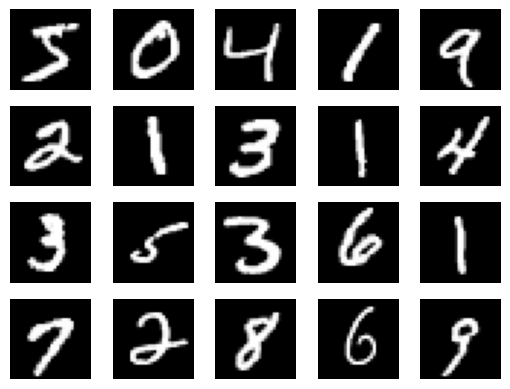

In [1]:
import utils as U
# Load MNIST data:
train_x, train_y, test_x, test_y = U.get_MNIST_data('Datasets/mnist.pkl.gz')
# Plot the first 20 images of the training set.
U.plot_images(train_x[0:20, :])

After seeing the problem, your classmate Alice immediately argues that we can apply a linear regression model, as the labels are numbers from 0-9, very similar to the example we learned from Unit 1. Though being a little doubtful, you decide to have a try and start simple by using the raw pixel values of each image as features.

Alice wrote a skeleton code run_linear_regression_on_MNIST in main.py, but she needs your help to complete the code and make the model work.

## Closed Form Solution of Linear Regression

The Closed Form Solution of Linear Regression, particularly when referring to **linear regression with L2 regularization** (also known as Ridge Regression), is a mathematical approach to find the optimal parameters (weights) of the model without needing iterative optimization methods like Gradient Descent. This solution directly computes the weights that minimize the cost function of the linear regression model.

### Mathematical Expression
Given a dataset with $n$ samples, each having $d$ features. The Closed Form Solution for $\theta$ for Ridge Regression is given by:

$$\theta = (X^TX + \lambda I)^{-1}X^TY$$

where:
- $X$ is the feature matrix,
- $Y$ is the vector of labels,
- $\lambda$ is the regularization parameter,
- $X^T$ is the transpose of $X$,
- $I$ is the identity matrix of size $(d+1) \times (d+1)$ (to exclude the bias term from regularization, the first element of $I$, $I_{00}$, is set to 0),
- $(X^TX + \lambda I)^{-1}$ is the inverse of the matrix $(X^TX + \lambda I)$.

### Python Implementation

In [2]:
import utils as U
import numpy as np
import test_utils as T

# Jupiter notebook cache the imported modules, so we need to reload the module to get the latest changes
import importlib
importlib.reload(T)

# Create a link to the test_utils.py file
# ln -s /Users/n03an/Documents/projects/AI/edx/MIT-MachineLearning-MicroMasters/test/utils.py test_utils.py 

def run_linear_regression_on_MNIST(lambda_factor=1, dataset='Datasets/mnist.pkl.gz'):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    # Load MNIST data
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    # Add bias dimension (adds a column of ones to the training features)
    # This bias term allows the linear regression model to learn an intercept term.
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    # Add bias dimension to test data
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    # Compute parameter / weights using closed form solution using training data
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    # Compute test error using test data
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error

def closed_form(X, Y, lambda_factor):
    """
    Computes the closed form solution of linear regression with L2 regularization

    Args:
        X - (n, d + 1) NumPy array (n datapoints each with d features plus the bias feature in the first dimension)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        lambda_factor - the regularization constant (scalar)
    Returns:
        theta - (d + 1, ) NumPy array containing the weights of linear regression. Note that theta[0]
        represents the y-axis intercept of the model and therefore X[0] = 1
    """

    I = np.identity(X.shape[1])
    #  np.dot(X.T, X) == X.T @ X
    theta = np.linalg.inv((X.T @ X) + (lambda_factor * I)) @ X.T @ Y
    return theta

def compute_test_error_linear(test_x, Y, theta):
    # Look at individual pridictions and compare to actual
    # (nsamples, nfeatures) = test_x.shape
    # for i in range(nsamples):
    #     prediction = np.round(np.dot(test_x[i], theta))
    #     print(f"Prediction: {prediction}, Actual: {Y[i]}")
    test_y_predict = np.round(np.dot(test_x, theta))
    test_y_predict[test_y_predict < 0] = 0
    test_y_predict[test_y_predict > 9] = 9
    return 1 - np.mean(test_y_predict == Y)

# Test
def check_closed_form():
    ex_name = "Closed form"
    X = np.arange(1, 16).reshape(3, 5)
    Y = np.arange(1, 4)
    lambda_factor = 0.5
    exp_res = np.array([-0.03411225,  0.00320187,  0.04051599,  0.07783012,  0.11514424])
    if T.check_array(
            ex_name, closed_form,
            exp_res, X, Y, lambda_factor):
        return

    T.log(T.green("PASS"), ex_name, "")

check_closed_form()

# Run linear regression on MNIST dataset with varying regularization constants
print('Linear Regression test_error with regularization constant as 1  =', run_linear_regression_on_MNIST(lambda_factor=1))
print('Linear Regression test_error with regularization constant as 0.1 =', run_linear_regression_on_MNIST(lambda_factor=0.1))
print('Linear Regression test_error with regularization constant as 0.01 =', run_linear_regression_on_MNIST(lambda_factor=0.01))

PASS Closed form 
Linear Regression test_error with regularization constant as 1  = 0.7697
Linear Regression test_error with regularization constant as 0.1 = 0.7698
Linear Regression test_error with regularization constant as 0.01 = 0.7702


```python
def compute_test_error_linear(test_x, Y, theta):
    test_y_predict = np.round(np.dot(test_x, theta))
    test_y_predict[test_y_predict < 0] = 0
    test_y_predict[test_y_predict > 9] = 9
    return 1 - np.mean(test_y_predict == Y)
```


The function `compute_test_error_linear` in the provided code snippet calculates the test error for linear regression. Here's a step-by-step explanation of how it works:

1) **Predict Test Labels**: It uses the linear regression model's weights (`theta`) to predict the labels for the test dataset. This is done by multiplying the test feature matrix (`test_x`) with the weight vector (`theta`). The result is a vector of predicted continuous values.

2) **Round Predictions**: The continuous predictions are rounded to the nearest integer using np.round, as the MNIST labels are integers from 0 to 9. This step converts the continuous predictions into discrete class labels.

3) **Clip Predictions**: The predictions are then clipped to the range [0, 9] using `test_y_predict[test_y_predict < 0] = 0` and `test_y_predict[test_y_predict > 9] = 9`. This ensures that after rounding, any prediction outside the valid range of labels is corrected to the nearest valid label.

4) **Calculate Test Error**: Finally, the test error is calculated by comparing the predicted labels (`test_y_predict`) with the actual labels (`Y`). The comparison `test_y_predict == Y` produces a boolean array, where True indicates a correct prediction and False indicates an incorrect prediction. The mean of this boolean array gives the accuracy (the proportion of correct predictions). Subtracting this accuracy from 1 gives the error rate, i.e., the proportion of incorrect predictions.

The function returns the final test error, which is the proportion of the test dataset that was incorrectly classified by the linear regression model.

### Note
Notice how the error rate is so high irrespective of regularization $\lambda$. The function `compute_test_error_linear` calculates the test error for a linear regression model applied to a classification problem (MNIST digits classification). Linear regression is not the best choice for classification tasks, especially for multi-class problems like MNIST. Hence it does not matter what regularization constant we use, but the choice of the model itself.

## Support Vector Machine

Support Vector Machine or SVM is a supervised machine learning algorithm which is generally used for classification tasks. The idea was presented by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963 assuming that the data points are linearly separable. Later, Vladimir N. Vapnik extended this initial idea and introduced something called as “kernel trick” to enable non-linear classifications too.

A **linear SVM classifier** assumes that the vectors are linearly separable, meaning we can draw a linear decision boundary to represent our classifier. In an n-dimensional space, this boundary is called a **hyperplane**. In 2-D, it is a line; in 3-D, a plane; and in higher dimensions, a hyperplane. The key idea is that the decision boundary is linear and divides the space so that all examples of class C1 lie on one side and all examples of class C2 lie on the other. Our goal is to find a hyperplane that separates positive training examples (C1) from negative ones (C2). We aim to learn the equation of this hyperplane, which represents our hypothesis. In machine learning, we hypothesize about the function linking input to output and proceed accordingly.

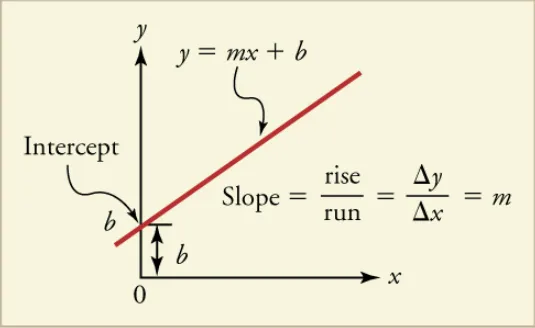

Here is an example of a 2-D space where the hyperplane is a line. `m` is the slope of the line and `b` is a constant. The slope (coefficient of x or parameters or weights) generally gives an idea of the orientation of the line with respect to x-axis and b represents the bias. Bias is a constant value that represents nothing but the position of the line from origin.

##### The hyperplane is the classifier
and can be represented as $y = mx + b$ or in a more standard notation as

$$
w \cdot X + b = 0
$$

The above equation is the decision boundary (Hyperplane) where the function $f(x)$ equals zero. This is the actual hyperplane that seperates the two classes. Below is how the decision function $f(x)$ can be represented and is used to classify points and determine on which side of hyperplane a point lies

$$
f(x) = w^T \cdot X + b
$$

where 
- $w$ is an n-dimensional column vector representing weights
- $X$ is also an n-dimensional column vector representing features
- $w^T.X$ is the dot product of weight vector and feature vector. The trasnpose will make the weight column vector into row vector to product of scalar value for dot product.


### The Hyperplane Examples

In a 2D space, a line $x - 2y + 3 = 0$ as a hyperplan can be represented with $W = [1, -2]$, $X = [x, y]$ and bias $b = 3$. Also note that the coefficient $1$ is associated with feature $x$ and coefficient $-2$ is associated with feature $y$. $3$ is the bias term (intercept).

> **Hyperplane in 2D** \
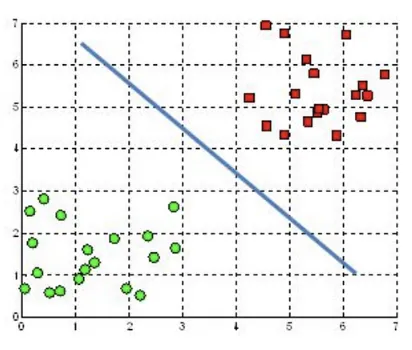

Similarly for a plan in 3d space say 2x + 3y + 4z + 3 = 0, the $W = [2, 3, 4]$, $X = [x, y, z]$ and bias, $b= 3$. The vector $[2, 3, 4]$ will always be normal to the plane $2x + 3y + 4z + 3 = 0$

> **Hyperplane in 3D** \
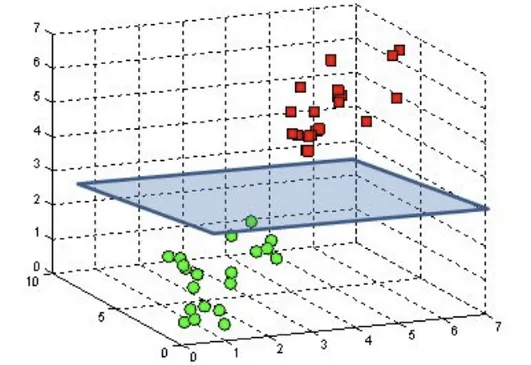


## Classification: Learning via Decision function

We understand that Hyperplane $w.X + b = 0$ divides the n-dimentional space into 2 half, and decision function $f(x) = w^T.X + b$ is used to classify data points and determine on which side of hyperplane it lies.

- if $f(x)$ > 0, the point x is classified as belonging to the positive class (C1)
- if $f(x)$ < 0, the point x is classified as belonging to the negative class (C2)
- if $f(x)$ = 0, the point x lies exactly on the hyperplane

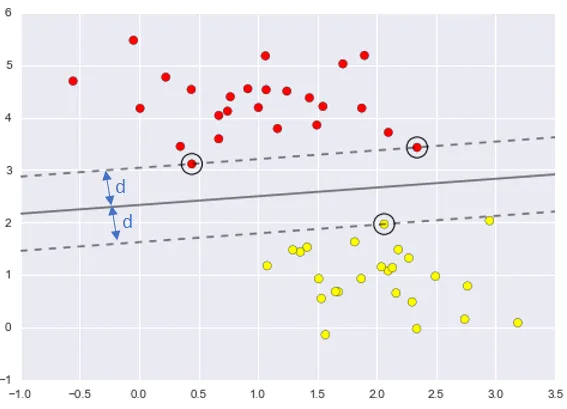

SVM aims to identify a hyper-plane or line that equally distances the nearest vectors from both classes, known as "Support Vectors"—hence the algorithm's name. The hyper-plane maintains a distance 'd' from the support vectors of each class. SVM uses only these support vectors to form the decision boundary, making it resilient to outliers since vectors far from the support vectors don't influence the boundary. The goal is to maximize this margin 'd' to establish the decision boundary equidistant from the support vectors on both sides.


### Constraint
In SVM learning, we want the margin or distance (d) between the hyper-plane and support vectors to be as large as possible. WHY? Just try to think what we are trying to achieve here and how will ‘having maximum margin/distance’ help in that. So, more the distance, better the classifier is. We don’t want any of the example to fall in the gutter (the space between hyper-planes that pass through support vectors). We need to respect this condition when we try to maximize the margin mathematically. This condition, is referred to as a “constraint”.

So, given a dataset of $n$ points of the form $(X, y)$ where $X$ is a feature vector and $y \in \{-1, 1\}$ is the class label, the SVM finds the hyperplane that separates the classes with the maximum margin. This hyperplane can be described by the equation:

$$
\mathbf{w} \cdot X + b = 0
$$

The objective is to minimize $\|\mathbf{w}\|$ by maximizing the  margin between the two classes seperated by the hyperplane defined by $\mathbf{w} \cdot X + b = 0$. The constraint $y_i(\mathbf{w} \cdot X + b) \geq 1$ for all $i$ ensures that all data points $x_i$ are correctly classified with a margin at least 1, where $y$ are the class labels $(-1) or (1)$. 



### One Vs Rest SVM Problem

> Bob thinks it is clearly not a regression problem, but a classification problem. He thinks that we can change it into a binary classification and use the support vector machine we learned in Lecture 4 to solve the problem. In order to do so, he suggests that we can build an one vs. rest model for every digit. For example, classifying the digits into two classes: 0 and not 0.

> Bob wrote a function run_svm_one_vs_rest_on_MNIST where he changed the labels of digits 1-9 to 1 and keeps the label 0 for digit 0. He also found that sklearn package contains an SVM model that you can use directly. He gave you the link to this model and hopes you can tell him how to use that.


The "one-vs-rest" (OvR) strategy, used in the context of SVM (Support Vector Machine) for multi-class classification, involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. This approach transforms a multi-class classification problem into multiple binary classification problems.

In case of Bob's example (below function), he is first trying with 2 classes i.e. 0 (class C1) Vs 1-9 (class C2)

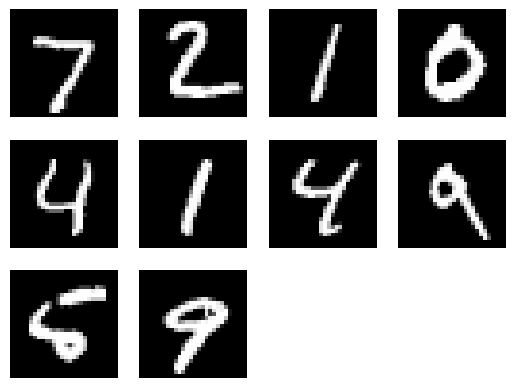

First 10 prediction: [1 1 1 0 1 1 1 1 1 1]
SVM one vs. rest test_error: 0.007499999999999951
The model incorrectly classified 0.75% of the test data.


In [22]:
import utils as U
from sklearn.svm import LinearSVC
import numpy as np


def run_svm_one_vs_rest_on_MNIST(dataset='Datasets/mnist.pkl.gz'):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

def compute_test_error_svm(test_y, pred_test_y):
    return 1 - np.mean(pred_test_y == test_y)

def one_vs_rest_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for binary classifciation

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (0 or 1) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (0 or 1) for each test data point
    """
    # Train the SVM model
    clf = LinearSVC(C=0.1, random_state=0)
    clf.fit(train_x, train_y)
    pred_test_y = clf.predict(test_x)
    
    U.plot_images(test_x[0:10, :])
    print(f"First 10 prediction: {pred_test_y[0:10]}")

    return pred_test_y


test_error = run_svm_one_vs_rest_on_MNIST()
print('SVM one vs. rest test_error:', test_error)
print(f"The model incorrectly classified {test_error * 100:.2f}% of the test data.")

The regularization parameter in SVM, often denoted as (C), plays a crucial role in controlling the trade-off between achieving a low training error and maintaining a low model complexity to avoid overfitting. Here's how the regularization parameter impacts the SVM model:

- High (C) values: A high (C) value gives more importance to minimizing the training error, which means the SVM model will try to classify all training examples correctly, even if it has to make the decision boundary more complex. This can lead to a model that fits the training data very well but may not generalize well to unseen data (overfitting).
Low (C) values:

- A low (C) value prioritizes simplicity of the decision boundary, even if it means allowing more misclassifications on the training data. This can lead to a model with higher bias but lower variance, potentially improving its generalization to new, unseen data (underfitting if (C) is too low).

### Multi Class SVM using oneVsRest strategy

For a dataset with (N) classes, (N) separate SVMs are trained. Each SVM decides whether an instance belongs to one of the classes or to the rest of the classes. When classifying a new instance, all (N) classifiers are evaluated, and the classifier that predicts the instance with the highest confidence classifies the instance. 

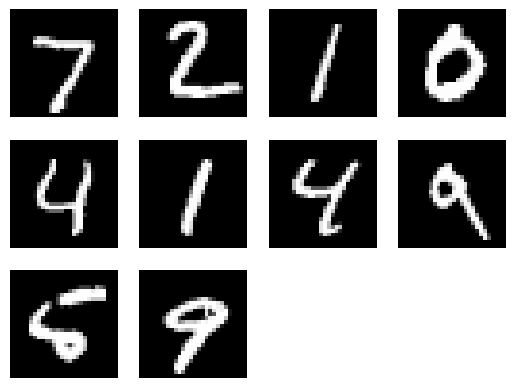

First 10 prediction: [7 2 1 0 4 1 4 9 6 9]
Multiclass SVM test_error: 0.08199999999999996
The model incorrectly classified 8.20% of the test data.


In [23]:
import utils as U
from sklearn.svm import LinearSVC
import numpy as np

def multi_class_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for multiclass classifciation using a one-vs-rest strategy

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (int) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (int) for each test data point
    """
    # Train the SVM model
    clf = LinearSVC(C=0.1, random_state=0)
    clf.fit(train_x, train_y)
    pred_test_y = clf.predict(test_x)

    U.plot_images(test_x[0:10, :])
    print(f"First 10 prediction: {pred_test_y[0:10]}")

    return pred_test_y

def run_multiclass_svm_on_MNIST(dataset='Datasets/mnist.pkl.gz'):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


test_error = run_multiclass_svm_on_MNIST()
print('Multiclass SVM test_error:', test_error)
print(f"The model incorrectly classified {test_error * 100:.2f}% of the test data.")

## Sigmoid Function (Logistic Function)

The most common sigmoid function used in machine learning is Logistic Function (formula below).

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

The formula is simple, but it is quite useful because it offers us some nice properties:

- It maps the feature space into **probability functions**
- It uses exponential
- It is differentiable

## Softmax

Softmax function, a wonderful activation function for **classification problems** that turns numbers aka logits into probabilities that sum to one. Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes

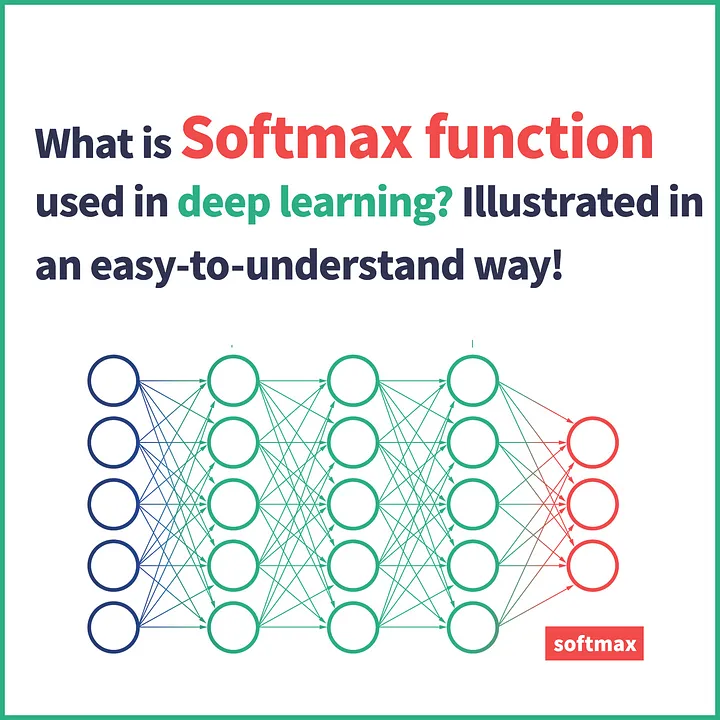

In deep learning, the term **logits** layer is popularly used for the last neuron layer of neural network for classification task which produces raw prediction values as real numbers ranging from [-infinity, +infinity ]. — Wikipedia

Logits are the raw scores output by the last layer of a neural network. Before activation takes place.

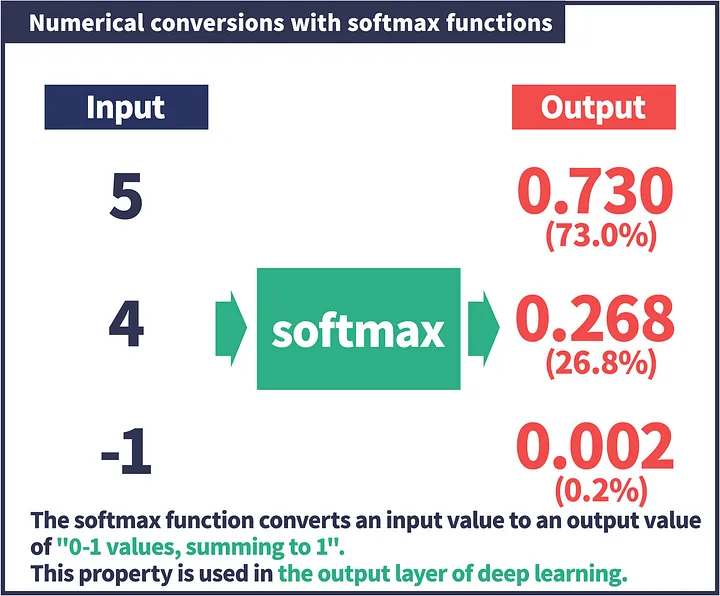

The above slide shows that Softmax function turns logits [5, 4, -1] into probabilities [0.730, 0.268, 0.002], and the probabilities sum to 1.

Softmax turn logits (numeric output of the last linear layer of a multi-class classification neural network) into probabilities by take the exponents of each output and then normalize each number by the sum of those exponents so the entire output vector adds up to one — all probabilities should add up to one. Softmax is frequently appended to the last layer of an image classification network such as those in CNN ( VGG16 for example) used in ImageNet competitions.

The softmax function $h(x)$ mathematical representation consist of a temperature parameter $\tau$ (temp_parameter) that controls the "sharpness" of the output probability distribution.

### Mathematical Expression Explained

Given:
- $x$, a feature vector from the dataset $X$,
- $\theta$, a matrix of parameters where each row $\theta_j$ represents the parameters for class $j$,
- $\tau$, the temperature parameter that adjusts the distribution sharpness,

the softmax function $h(x)$ is defined as:

$$ h(x) = \frac{1}{\sum _{j=0}^{k-1} e^{\theta _ j \cdot x / \tau }} \begin{bmatrix}  e^{\theta _0 \cdot x / \tau } \\ e^{\theta _1 \cdot x / \tau } \\ \vdots \\ e^{\theta _{k-1} \cdot x / \tau } \end{bmatrix} $$


This expression calculates the probability distribution over $k$ classes for a given input vector $x$, where:
- The numerator $e^{\theta_j \cdot x / \tau}$ is the exponentiated scaled dot product between the parameter vector for class $j$ and the input vector $x$, making the raw scores positive and scaling them according to $\tau$.
- The denominator is the sum of these exponentiated, scaled dot products for all classes, ensuring that the probabilities sum to 1.

#### n03an's attempt
If the above explanation isnt clear then understand that the last layer of a multi-class neural network would always be represented with scores accross $k$ finite classes. And then you apply Softmax to show probabilities for these scores (all probabilities would sum to 1), out of which one of more class probability be activated (have higher values / probabilities). The goal is to classify into one confident class. 

**Example:** In an image recognization problem with 3 classes as cat,dog and horse

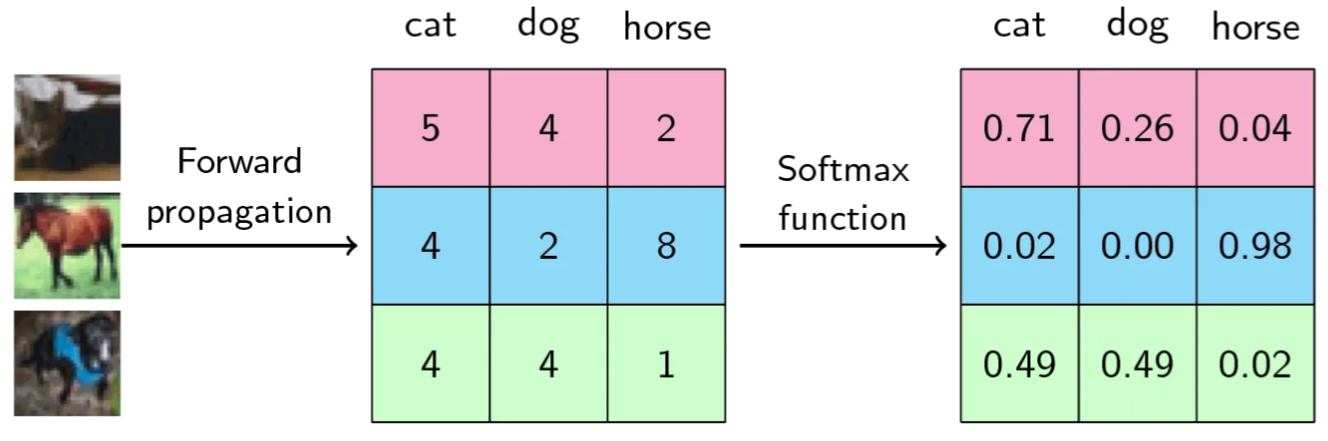

For the first input image on the left, the first row of middle square represents last layer of neural network with 3 scores [5, 4, 2] accross 3 classses [cat, dog, horse], which is then fed into Softmax to calculate probabilities [0.71, 0.26, 0.04]. Its clear that the class `cat` is activated with higher probability of `0.71`. Similarly for second image, the `horse` class is activated. BUT for the last image, both `cat` and `dog` have equal probability and this allows the model to respont "I am not sure" with an indication that it could be cat or dog.

##### Preventing numerical overflow
**Note:** the terms $e^{\theta_j \cdot x / \tau}$ may be very large or very small, due to the use of the exponential function. This can cause numerical or overflow errors. To deal with this, we can simply subtract some fixed amount $c$ from each exponent to keep the resulting number from getting too large. 

$$
h(x) = \frac{e^{-c}}{e^{-c}\sum _{j=0}^{k-1} e^{\theta _ j \cdot x / \tau }} \begin{bmatrix}  e^{\theta _0 \cdot x / \tau } \\ e^{\theta _1 \cdot x / \tau } \\ \vdots \\ e^{\theta _{k-1} \cdot x / \tau } \end{bmatrix} \\ = \frac{1}{\sum _{j=0}^{k-1} e^{[\theta _ j \cdot x / \tau ] - c}} \begin{bmatrix}  e^{[\theta _0 \cdot x / \tau ] - c} \\ e^{[\theta _1 \cdot x / \tau ] - c} \\ \vdots \\ e^{[\theta _{k-1} \cdot x / \tau ] - c} \end{bmatrix},
$$

##### Why not just divide each logits by the sum of logits? 
Why do we need exponents? Logits is the logarithm of odds (wikipedia https://en.wikipedia.org/wiki/Logit) see the graph on the wiki page, it ranges from negative infinity to positive infinity. When logits are negative, adding it together does not give us the correct normalization. exponentiate logits turn them them zero or positive!

```python
e**(100) = 2.6881171e+43
e**(-100) = 3.720076e-44 # a very small number
3.720076e-44 > 0 # still returns true
```

By the way, special number `e` exponents also makes the math easier later! Logarithm of products can be easily turned into sums for easy summation and derivative calculation. `log(a*b)= log(a)+log(b)`

### Python Implementation

To implement the softmax function as described for a dataset $X$ and parameter matrix $\theta$, you can use the following Python code:



In [109]:
import numpy as np
import utils as U

def compute_softmax_probabilities(X, theta, temp_parameter):
    # Compute the scaled dot product: (n, d) dot (k, d).T -> (n, k)
    scaled_scores = np.dot(X, theta.T) / temp_parameter
    
    # Prevent numerical overflow by subtracting the max score from each score
    scaled_scores -= np.max(scaled_scores, axis=1, keepdims=True)
    
    # Exponentiate the adjusted scores
    exp_scores = np.exp(scaled_scores)
    
    # Normalize the scores to get probabilities: (n, k)
    probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Transpose to match the expected output shape (k, n)
    return probabilities.T



### Explanation

1. **Compute Scaled Scores**: Multiply the input matrix $X$ by the transpose of the parameters matrix $\theta$ and divide by the temperature parameter $\tau$. This gives the scaled raw scores for each class and input.

2. **Adjust for Numerical Stability**: Subtract the maximum score from each scaled score within an input to prevent numerical overflow when exponentiating.

3. **Exponentiate**: Apply the exponential function to each adjusted score to ensure they are positive.

4. **Normalize**: Divide each exponentiated score by the sum of all exponentiated scores for that input. This step ensures that the probabilities for each input sum up to 1 across all classes.

5. **Transpose**: The resulting matrix is transposed to match the expected output shape $(k, n)$, where each entry $H[j][i]$ represents the probability that input $X[i]$ is labeled as class $j$.

## Binary cross-entrophy / log loss

When we train classification models, we are most likely to define a loss function that describes how much out predicted values deviate from the true values. Then we will use gradient descent methods to adjust model parameters in order to lower the loss. It is a type of optimization problem, and also called backpropagation in deep learning.

Let’s start with 10 random points:

```python
x = [-2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6]
```

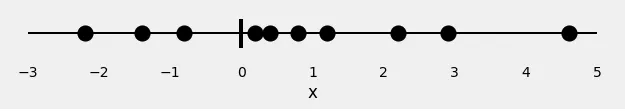

Now, let’s assign some colors to our points: red and green. These are our labels.

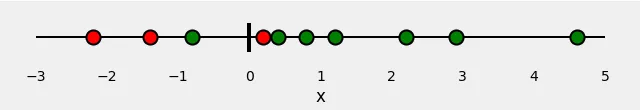

So, our classification problem is quite straightforward: given our feature x, we need to predict its label: red or green. Since this is a binary classification, we can also pose this problem as: “is the point green” or, even better, “what is the probability of the point being green”? Ideally, green points would have a probability of 1.0 (of being green), while red points would have a probability of 0.0 (of being green).

Now if we plot the points using sigmoid curve, representing the probability of a point being green for any given x . It looks like this:

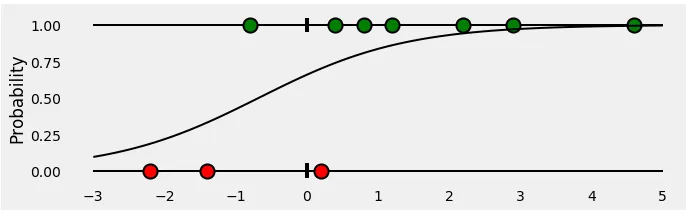

i.e. for all the points belonging to the positive class (green), the probability would be \
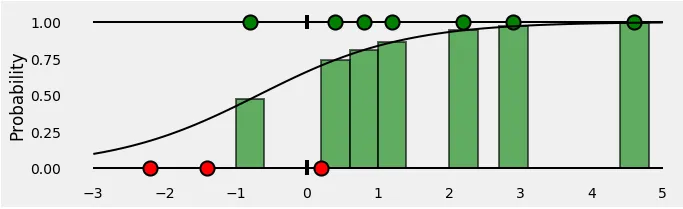

and for negative class (red) \
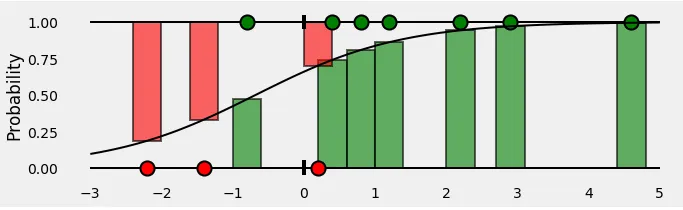

or perhaps \
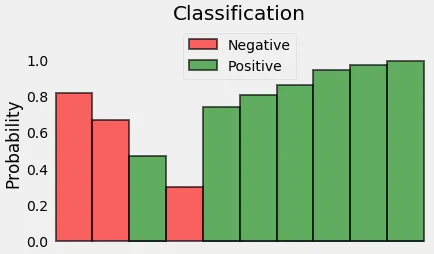


Since we’re trying to compute a loss, we need to penalize bad predictions. So, if the probability associated with the true class is 1.0, we need its loss to be zero. Conversely, if that probability is low, say, 0.01, we need its loss to be HUGE!

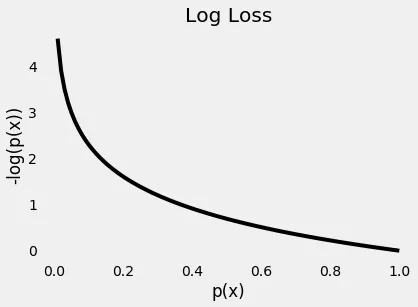

The plot below gives us a clear picture —as the predicted probability of the true class gets closer to zero, the loss increases exponentially

Let’s take the (negative) log of the probabilities — these are the corresponding losses of each and every point.

Finally, we compute the mean of all these losses.

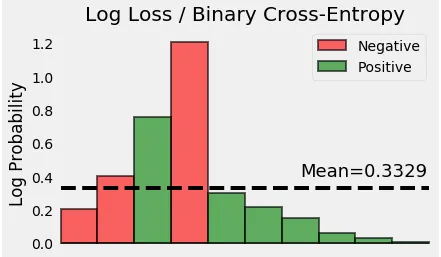

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss (OR) Cross Entropy = {:.4f}'.format(loss))

x = [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y = [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss (OR) Cross Entropy = 0.3329


#### Distribution and Entrophy
Let’s start with the distribution of our points. Since y represents the classes of our points (we have 3 red points and 7 green points), this is what its distribution, let’s call it q(y), looks like:

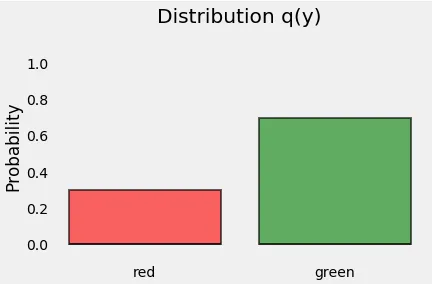

**Entropy** is a measure of the uncertainty associated with a given distribution q(y).

So if all our points were green then there is no uncertainty in distribution. So, entropy is zero!

On the other hand, what if we knew exactly half of the points were green and the other half, red? That’s the worst case scenario. We would have absolutely no edge on guessing the color of a point: it is totally random! For that case, entropy is given by $log(2)$ (we have two classes (colors)— red or green — hence, 2). So, if we know the true distribution of a random variable, we can compute its entropy. **But, what if we DON’T? Can we try to approximate the true distribution with some other distribution, say, p(y)**




#### Log Loss (Binary Cross-Entropy Loss)

The mathematical expression for log loss, also known as binary cross-entropy, for a set of observations is given by:

$$ \text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right] $$

Where:
- $N$ is the total number of observations.
- $y_i$ is the actual label of the $i$-th observation, which can be 0 or 1 in binary classification.
- $p_i$ is the predicted probability of the $i$-th observation for being in class 1 (positive class).
- $\log$ is the natural logarithm.

This formula calculates the average loss per observation across all observations, penalizing the predicted probabilities based on how far they are from the actual labels. The goal in optimization is to minimize this loss, which corresponds to improving the accuracy of the predictions.

Since the log function has the property that when y is at 0, its log goes to -infinity; when y is at 1, its log is at 0, we can use it to model the loss pretty efficiently. For an instance with true label 0:

- If the predicted value is 0, then the formula above will return a loss of 0.
- If the predicted value is 0.5, then the formula above will return a loss of 0.69
- If the predicted value is 0.99, then the formula above will return a loss of 4.6

In [75]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Given arrays
x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

# Sigmoid function to convert logits to probabilities
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model to predict probabilities
# Note, LR internally uses sigmoid function internally to model the probability that a given input belongs to the positive class 
def logisticRegression(x, y):
    # Fit the logistic regression model
    logr = LogisticRegression(solver='lbfgs')
    logr.fit(x.reshape(-1, 1), y)
    # Predict probabilities
    p_lr = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
    return p_lr

# Convert logits x to probabilities p
p = sigmoid(x)
p_lr = logisticRegression(x, y)

# Calculate log loss
log_loss_sigmoid = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
log_loss_lr = -np.mean(y * np.log(p_lr) + (1 - y) * np.log(1 - p_lr))

print('p(y_lr) = {}'.format(np.round(p_lr, 2)))
print('p(y_sigmoid) = {}'.format(np.round(p, 2)))
print("Log Loss using Sigmoid:", log_loss_sigmoid)
print("Log Loss using LR:", log_loss_lr)

p(y_lr) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
p(y_sigmoid) = [0.1  0.2  0.31 0.55 0.6  0.69 0.77 0.9  0.95 0.99]
Log Loss using Sigmoid: 0.3610786398744589
Log Loss using LR: 0.332939988498614


## Cross-entrophy loss (Multi Class)


After understanding the binary log loss, we can easily extend it to multi-class classification problems. Below $J(\theta)$ is a generalized form of the cross-entropy loss function for multi class. It only sums the log of the probability when the instance class is $j$, similar to the binary case, where there is always only part of the expression taken account of, and the others are just 0. The cost function $J(\theta)$ uses softmax function for calculating probabilities and also includes a regularization term to prevent overfitting by penalizing large weights.

### Mathematical Expression

**Given:** $n$ samples, each with $d$ features and $k$ possible classes

$$
J(\theta ) = -\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j=0}^{k-1} [[y^{(i)} == j]] \log {\frac{e^{\theta _ j \cdot x^{(i)} / \tau }}{\sum _{l=0}^{k-1} e^{\theta _ l \cdot x^{(i)} / \tau }}}\Bigg] + \frac{\lambda }{2}\sum _{j=0}^{k-1}\sum _{i=0}^{d-1} \theta _{ji}^2
$$

**Where:** \
$j$ is a single class from $k$ possible classes. Similarly $\theta$ represents parameter/weights for every d features in each class i.e. $\theta _{j}$ represents $d$ parameters/weights for class $j$.
- $x^{(i)}$ denotes the feature vector of the $i$-th sample from $n$ samples.
- $y^{(i)}$ is the actual class of the $i$-th sample.
- $\theta_j$ is the parameter vector for class $j$.
- $\tau$ is the temperature parameter, adjusting the "sharpness" of the probability distribution.
- $\lambda$ is the regularization parameter controlling the extent of regularization.
- $[[y^{(i)} == j]]$ is an indicator function that is 1 if $y^{(i)}$ is class $j$, and 0 otherwise.

The cost function consists of two parts:
1. **Cross-Entropy Loss**: The first term measures the prediction error. For each sample $i$, it computes the log of the predicted probability for the true class $y^{(i)}$, summed over all samples and classes. This term encourages the model to assign high probabilities to the correct classes.
2. **Regularization Term**: The second term is the regularization part, which sums the squares of all parameters in $\theta$, scaled by $\frac{\lambda}{2}$. This term discourages overly complex models by penalizing large weights.

Before we look at python code, lets understand One-Hot encoding

#### One-Hot Encoding (Multi Class Label's)

The One-Hot Encoding technique is crucial in machine learning and data processing, as it enables algorithms to efficiently handle and interpret categorical data, which is inherently non-numerical. 
This involves creating arrays where each category is represented by a distinct vector, with a '1' in the position corresponding to the category and '0's elsewhere.

- Identify Unique Categories: Determine all the unique categories in your dataset.
- Create a Binary Array: For each category, create an array where the length of the array is equal to the number of unique categories.
- Fill Array By Category: The final step of creating a one-hot encoded array is a straightforward process. You start by initializing an array of zeros with dimensions that match the number of samples and the number of unique categories. Then, you iterate over your data, setting the appropriate element in each row to '1' based on the category of that sample.

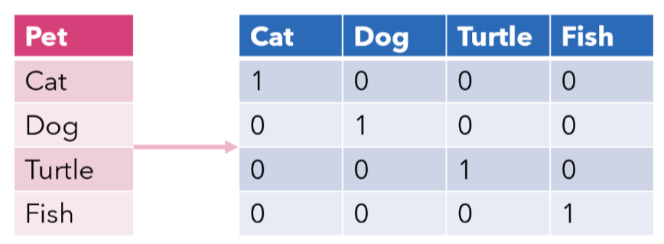

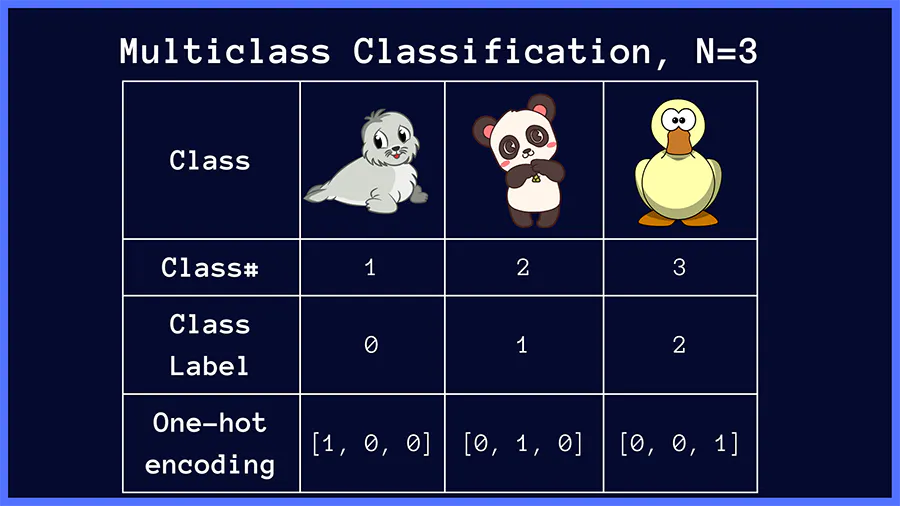

In [204]:
import numpy as np

# input vector
X = np.array(['cat', 'dog', 'fish', 'dog'])

# Step 1. Identify Unique Classes
# In addition also find their indices from input vector
classes, class_indices = np.unique(X, return_inverse=True)

n = X.size # number of samples
k = classes.size  # number of classes

# Create the one-hot encoded matrix
one_hot = np.zeros((n, k)) # Step 2: initialise a zero matrix of size (n, k)
one_hot[np.arange(n), class_indices] = 1 #Step 3. Encode Each Sample. Set the appropriate indices to 1

print(one_hot)

# Generating random data for testing
n, d, k = 100, 10, 3  # 100 samples, 10 features, 3 classes
X = np.random.randn(n, d)  # Random features
Y_one_hot = np.eye(k)[np.random.choice(k, n)]  # Random one-hot encoded labels
# np.eye(k) will create an identity matrix of size kxk. np.random.choice(k, n) will create random n size array with values from 0 to k-1.
# putting them together will generated a nxk matrix with each row would have 1 on the index based on random value from 0 to k-1

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


#### Python Example for Cross-entrophy loss (Multi Class)

Let's implement this cost function in Python. Assume `X` is the feature matrix `(n, d)`, `Y` is the one-hot encoded labels matrix `(n, k)`, `theta` is the parameters matrix `(k, d)`, `tau` is the temperature parameter, and `lambda_` is the regularization parameter.

In [206]:
import numpy as np

def softmax(X, theta, temp_parameter):
    logits = np.dot(X, theta.T) / temp_parameter
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    return probabilities

def softmax_cost_function(X, Y, theta, tau, lambda_):
    # Compute the softmax probabilities
    probabilities = softmax(X, theta, tau)
    # Compute the cross-entropy loss
    cross_entropy_loss = -np.sum(Y * np.log(probabilities)) / X.shape[0]
    # Compute the regularization term
    regularization_term = (lambda_ / 2) * np.sum(theta ** 2)
    # Total cost
    total_cost = cross_entropy_loss + regularization_term
    return total_cost

n, d, k = 100, 10, 3  # 100 samples, 10 features, 3 classes
X = np.random.randn(n, d)  # Random features
Y = np.eye(k)[np.random.choice(k, n)]  # Random one-hot encoded labels
theta = np.random.randn(k, d)  # Random parameters
tau = 1.0
lambda_ = 0.1

cost = softmax_cost_function(X, Y, theta, tau, lambda_)
print(f"Softmax cost function value: {cost}")

Softmax cost function value: 3.450398446516297


In above image classification example, if the target class is seal (class 1), the categorical cross-entropy loss is minimized when the network predicts a probability score close to 1 for the correct class (seal). This works similarly for the other target classes, panda and duck.

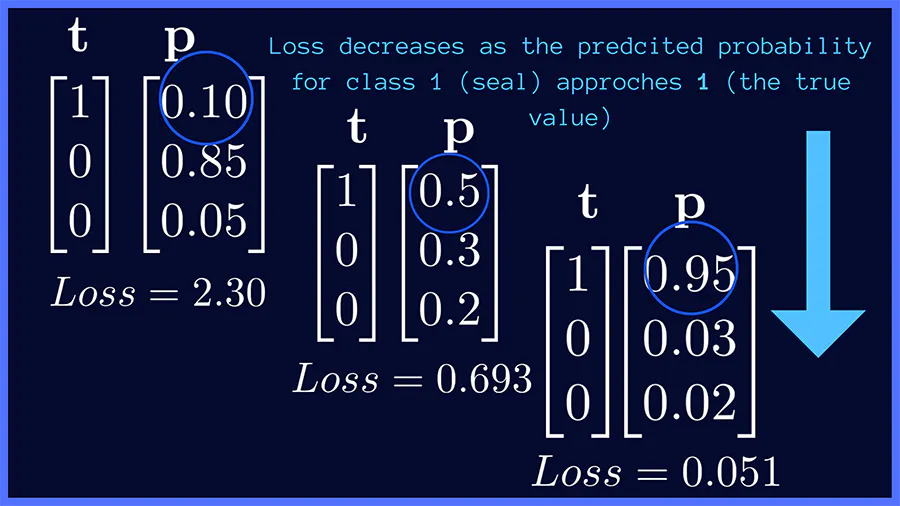

Here is another good visualization of how the Softmax and cost function is used on a neural network

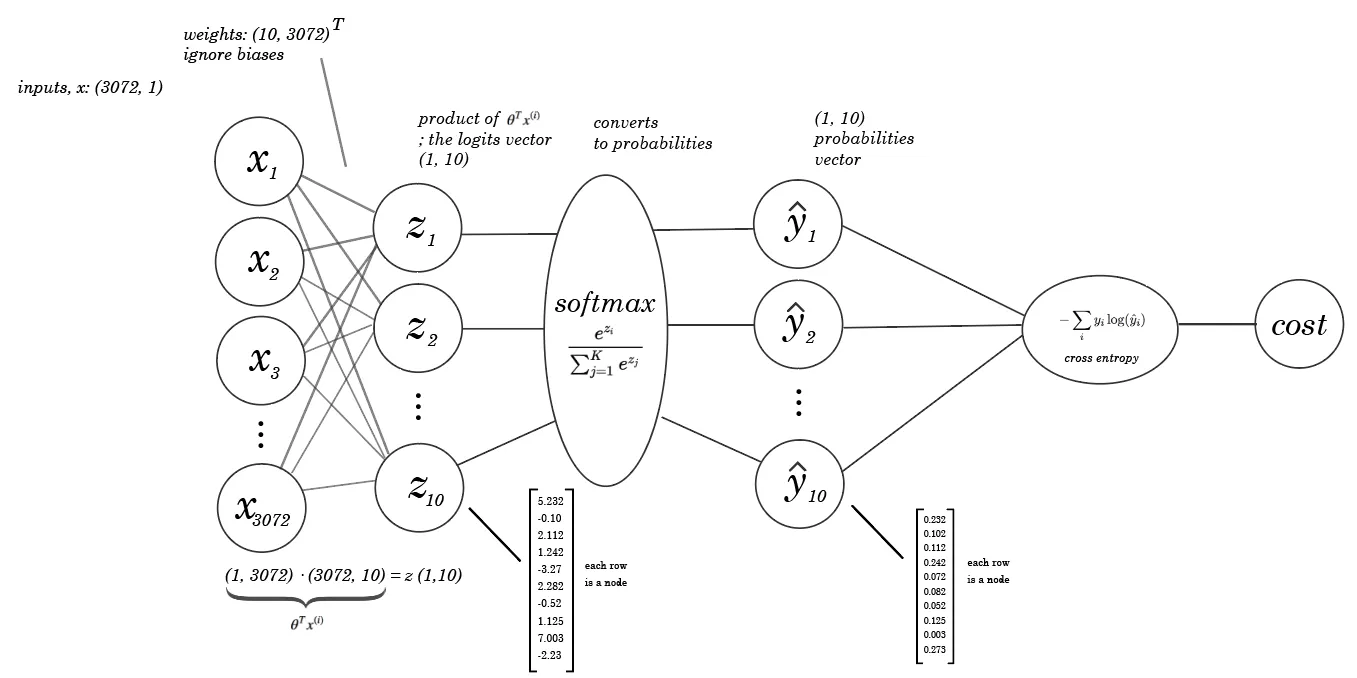

## Gradient Descent for Cross entrophy Loss and Softmax

**Lets recap**

The softmax function is used in classification problems where the model needs to predict the probabilities that a given input belongs to each possible class. The output of the softmax function for a class is a value between 0 and 1, and the sum of these probabilities for all classes equals 1.

Mathematically, the softmax function for a class $i$ given a vector $x$ of raw class scores from the final layer of the model is defined as:

$$ \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$

Where $x_i$ is the score for class $i$ and the denominator is the sum of the exponential scores for all $j$ classes.

The simplest form of the cross-entropy loss function , which for a single example can be written as:

$$ J(\theta) = -\sum_{i} y_i \log(\hat{y}_i) $$

Where $y_i$ is the actual distribution of classes (1 for the correct class, 0 for others) and $\hat{y}_i$ is the predicted probability of each class.


**We also learnt** the cross entprophy loss function for $n$ samples, each with $d$ features and $k$ possible classes (along with regularization term) can be written as

$$
J(\theta ) = -\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j=0}^{k-1} [[y^{(i)} == j]] \log {\frac{e^{\theta _ j \cdot x^{(i)} / \tau }}{\sum _{l=0}^{k-1} e^{\theta _ l \cdot x^{(i)} / \tau }}}\Bigg] + \frac{\lambda }{2}\sum _{j=0}^{k-1}\sum _{i=0}^{d-1} \theta _{ji}^2
$$

**Gradient descent**

is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In the context of softmax, the function we're trying to minimize is the cost function, which measures the difference between the predicted probabilities and the actual class distributions.

$$
softmax = \frac{e^{\theta _ j \cdot x^{(i)} / \tau }}{\sum _{l=0}^{k-1} e^{\theta _ l \cdot x^{(i)} / \tau }} = p(y^{(i)} = j | x^{(i)}, \theta )
$$

The gradient of the loss function is $\displaystyle  \displaystyle \frac{\partial J(\theta )}{\partial \theta _ m}$ i.e. derivative of loss function **by** derative of the parameters $\theta_m$

$$
\displaystyle  \displaystyle \frac{\partial J(\theta )}{\partial \theta _ m} \displaystyle  = \frac{\partial }{\partial \theta _ m}\Bigg[-\frac{1}{n}\Bigg[\sum _{i=1}^ n \sum _{j=0}^{k-1} [[y^{(i)} == j]] \log p(y^{(i)} = j | x^{(i)}, \theta ) \Bigg] + \frac{\lambda }{2}\sum _{j=0}^{k-1}\sum _{i=0}^{d-1} \theta _{ji}^2\Bigg]
$$

$$
\displaystyle  = -\frac{1}{\tau n} \sum _{i = 1} ^{n} [x^{(i)} \cdot ([[y^{(i)} == m]] - p(y^{(i)} = m | x^{(i)}, \theta ))] + \lambda \theta _ m
$$

### Formula Breakdown

- $\tau$: Temperature parameter that controls the "sharpness" of the softmax probabilities. A higher $\tau$ makes the probabilities closer to uniform (softer), while a lower $\tau$ makes the distribution more peaked.
- $n$: Number of training examples.
- $x^{(i)}$: Feature vector of the $i$-th training example.
- $y^{(i)}$: Actual label of the $i$-th training example.
- $m$: A particular class label out of $k$ possible classes.
- $[[y^{(i)} == m]]$: Indicator function that is 1 if $y^{(i)}$ is equal to $m$, and 0 otherwise.
- $p(y^{(i)} = m | x^{(i)}, \theta)$: Probability that the $i$-th example belongs to class $m$, as predicted by the model parameterized by $\theta$.
- $\lambda$: Regularization constant that controls the amount of regularization. Regularization helps prevent overfitting by penalizing large values of the parameters.
- $\theta_m$: Parameters associated with class $m$.

### Understanding the Gradient

The formula consists of two main parts:

1. **Gradient of the Loss Term**: $-\frac{1}{\tau n} \sum _{i = 1} ^{n} [x^{(i)}([[y^{(i)} == m]] - p(y^{(i)} = m | x^{(i)}, \theta ))]$

   This part computes the gradient of the loss function with respect to the parameters $\theta_m$. The loss function measures the discrepancy between the actual labels and the predictions made by the model. The gradient points in the direction of the steepest increase in the loss function, and we subtract a fraction of this gradient (scaled by the learning rate) from $\theta_m$ to update the parameters in the direction that minimally decreases the loss.

2. **Gradient of the Regularization Term**: $\lambda \theta _m$

   This part represents the gradient of the regularization term with respect to $\theta_m$. Adding this term to the gradient update discourages the parameters from growing too large, which helps prevent overfitting.

### Python Example

In [220]:
import matplotlib.pyplot as plt
import scipy.sparse as sparse

def run_gradient_descent_iteration(X, Y, theta, alpha, lambda_factor, temp_parameter):
    """
    Runs one step of batch gradient descent

    Args:
        X - (n, d) NumPy array (n datapoints each with d features)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        theta - (k, d) NumPy array, where row j represents the parameters of our
                model for label j
        alpha - the learning rate (scalar)
        lambda_factor - the regularization constant (scalar)
        temp_parameter - the temperature parameter of softmax function (scalar)

    Returns:
        theta - (k, d) NumPy array that is the final value of parameters theta
    """
    #YOUR CODE HERE
    num_examples = X.shape[0]
    num_labels = theta.shape[0]
    itemp = 1. / (temp_parameter * num_examples)
    probabilities = compute_softmax_probabilities(X, theta, temp_parameter)

    """
        M[i][j] = 1 if y^(j) = i and 0 otherwise.
        M is a matrix of size (num_labels, num_examples) where each column is a one-hot encoded vector

        For example, if we have 3 classes and 4 examples, and the labels are [0, 1, 2, 1], then M would be:
        Coords	Values
        (0, 0)	1
        (1, 1)	1
        (2, 2)	1
        (1, 3)	1

        Note sparse matrix in COOrdinate format are used to store data efficiently when the matrix contains a lot of zeros...toarray() would convert it to one-hot encoded vector
        
        [[1 0 0 0]
        [0 1 0 1]
        [0 0 1 0]]
    """
    M = sparse.coo_matrix(([1] * num_examples, (Y, range(num_examples))),
                          shape=(num_labels, num_examples)).toarray()
    
    # X . (M - probabilities)
    graident_of_loss = np.dot(M - probabilities, X)
    graident_of_loss *= -itemp
    
    graident_of_regularized_term = lambda_factor * theta

    return theta - alpha * (graident_of_loss + graident_of_regularized_term)

# Example feature matrix (4 examples, 3 features each)
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
# Example labels (4 examples, 1 label each)
Y = np.array([0, 1, 2, 1])
# Initial parameters (3 classes, 3 features each)
theta = np.zeros((3, 3))
# Learning rate
alpha = 0.01
# Regularization constant
lambda_factor = 0.1
# Temperature parameter
temp_parameter = 1.0
# Running one iteration of gradient descent
theta_updated = run_gradient_descent_iteration(X, Y, theta, alpha, lambda_factor, temp_parameter)
print(theta_updated)

[[-0.01583333 -0.01666667 -0.0175    ]
 [ 0.01666667  0.01833333  0.02      ]
 [-0.00083333 -0.00166667 -0.0025    ]]
